# EDA

In [1]:
import os
import sys
import polars as pl
import numpy as np
#polarsの表示limitをなくす
pl.Config.set_tbl_cols(-1)

sys.path.append(os.path.join('..'))
from exp.features import Features, FeatureSelecter
from exp.models.cat import CatBoostModel
from exp.models.lgbm import LGBMModel
from exp.models.rf import RandomForestModel
from exp.models.rgf import RGFModel
from exp.models.xgb import XGBModel
from exp.models.lr import LinerRegressionModel

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import gc
gc.enable()

/home/education/signate_scup2023/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train = pl.read_csv('../input/train.csv')
test = pl.read_csv('../input/test.csv')

features = Features(train, test)
train, test = features.create_features()

train.head()

id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,odometer_f,age,odometer/age,odometer/cylinders,manufacturer_odometer_mean,manufacturer_odometer_std,manufacturer_odometer_max,manufacturer_odometer_min,manufacturer_odometer_diff,lat,lng,manufacturer_rank,condition_rank,fuel_rank,title_status_rank,transmission_rank,drive_rank,size_rank,type_rank,paint_color_rank,state_rank,manufacturer_count,condition_count,fuel_count,title_status_count,transmission_count,drive_count,size_count,type_count,paint_color_count,state_count,condition_l,size_l,manufacturer_mean,fuel_mean,title_status_mean,transmission_mean,drive_mean,type_mean,paint_color_mean,state_mean,manufacturer_acura,manufacturer_alfa_romeo,manufacturer_aston_martin,manufacturer_audi,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land_rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes_benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_diesel,fuel_electric,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_nan,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_other,drive_4wd,drive_fwd,type_SUV,type_bus,type_coupe,type_hatchback,type_mini-van,type_nan,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nan,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
i64,cat,i64,cat,cat,i8,cat,i64,cat,cat,cat,cat,cat,cat,cat,i64,f64,i64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
0,"""nashville""",1949,"""bmw""","""excellent""",6,"""gas""",115148,"""clean""","""manual""","""rwd""","""mid-size""","""convertible""","""orange""","""tn""",27587,115148.0,74,1556.054054,19191.333333,99532.887011,54592.395342,1484310,85,1484225,36.162277,-86.774298,35.0,6.0,5.0,7.0,2.0,1.0,3.0,6.0,3.0,38.0,3044,15219,24785,22365,6156,4834,9411,418,144,689,3,2,13968.291393,12270.566996,13276.948312,12058.838856,15846.747621,13664.002392,11200.854167,15837.718433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"""state college""",2013,"""toyota""","""fair""",8,"""gas""",172038,"""clean""","""automatic""","""rwd""","""full-size""","""sedan""","""silver""","""pa""",4724,172038.0,10,1

In [3]:
df = pl.concat([train, test], how="diagonal")

df.head()

id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,odometer_f,age,odometer/age,odometer/cylinders,manufacturer_odometer_mean,manufacturer_odometer_std,manufacturer_odometer_max,manufacturer_odometer_min,manufacturer_odometer_diff,lat,lng,manufacturer_rank,condition_rank,fuel_rank,title_status_rank,transmission_rank,drive_rank,size_rank,type_rank,paint_color_rank,state_rank,manufacturer_count,condition_count,fuel_count,title_status_count,transmission_count,drive_count,size_count,type_count,paint_color_count,state_count,condition_l,size_l,manufacturer_mean,fuel_mean,title_status_mean,transmission_mean,drive_mean,type_mean,paint_color_mean,state_mean,manufacturer_acura,manufacturer_alfa_romeo,manufacturer_aston_martin,manufacturer_audi,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land_rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes_benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_diesel,fuel_electric,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_nan,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_other,drive_4wd,drive_fwd,type_SUV,type_bus,type_coupe,type_hatchback,type_mini-van,type_nan,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nan,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
i64,cat,i64,cat,cat,i8,cat,i64,cat,cat,cat,cat,cat,cat,cat,i64,f64,i64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
0,"""nashville""",1949,"""bmw""","""excellent""",6,"""gas""",115148,"""clean""","""manual""","""rwd""","""mid-size""","""convertible""","""orange""","""tn""",27587,115148.0,74,1556.054054,19191.333333,99532.887011,54592.395342,1484310,85,1484225,36.162277,-86.774298,35.0,6.0,5.0,7.0,2.0,1.0,3.0,6.0,3.0,38.0,3044,15219,24785,22365,6156,4834,9411,418,144,689,3,2,13968.291393,12270.566996,13276.948312,12058.838856,15846.747621,13664.002392,11200.854167,15837.718433,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"""state college""",2013,"""toyota""","""fair""",8,"""gas""",172038,"""clean""","""automatic""","""rwd""","""full-size""","""sedan""","""silver""","""pa""",4724,172038.0,10,1

In [4]:
df.describe()

describe,id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,odometer_f,age,odometer/age,odometer/cylinders,manufacturer_odometer_mean,manufacturer_odometer_std,manufacturer_odometer_max,manufacturer_odometer_min,manufacturer_odometer_diff,lat,lng,manufacturer_rank,condition_rank,fuel_rank,title_status_rank,transmission_rank,drive_rank,size_rank,type_rank,paint_color_rank,state_rank,manufacturer_count,condition_count,fuel_count,title_status_count,transmission_count,drive_count,size_count,type_count,paint_color_count,state_count,condition_l,size_l,manufacturer_mean,fuel_mean,title_status_mean,transmission_mean,drive_mean,type_mean,paint_color_mean,state_mean,manufacturer_acura,manufacturer_alfa_romeo,manufacturer_aston_martin,manufacturer_audi,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land_rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes_benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_diesel,fuel_electric,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_nan,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_other,drive_4wd,drive_fwd,type_SUV,type_bus,type_coupe,type_hatchback,type_mini-van,type_nan,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nan,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
str,f64,str,f64,str,str,f64,str,f64,str,str,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",55069.0,"""55069""",55069.0,"""55069""","""55069""",55069.0,"""55069""",55069.0,"""55069""","""55069""","""55069""","""55069""","""55069""","""55069""","""55069""",55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55069.0,55

## region

ユニーク数が300近くあるので、onehotは適さないかも

自然言語を用いたアプローチを考えるべき？

In [5]:
uq_region_train = set(train["region"]) - set(test["region"])
uq_region_test = set(test["region"]) - set(train["region"])
print("Unique regions in train: ", uq_region_train)
print("Unique regions in test: ", uq_region_test)

Unique regions in train:  set()
Unique regions in test:  set()


In [6]:
df["region"].value_counts(sort=True)

region,counts
cat,u32
"""central NJ""",2166
"""rhode island""",1435
"""rochester""",1053
"""albany""",1034
"""washington, DC…",961
"""las vegas""",895
"""tampa bay area…",833
"""los angeles""",803
"""richmond""",685


## year

minは1918
maxは2022
よって基準年は2023年と仮定できる

yearの異常値は四桁目を間違えたtypoの可能性が高い
->2030以上は1000引く

ageは古くなると逆に価値が上がる。conditionと踏まえた特徴量を作るといいかも

<Axes: ylabel='Count'>

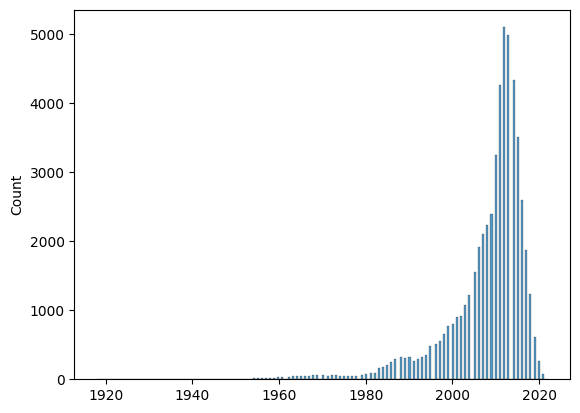

In [7]:
sns.histplot(df["year"])

<Axes: xlabel='age', ylabel='price'>

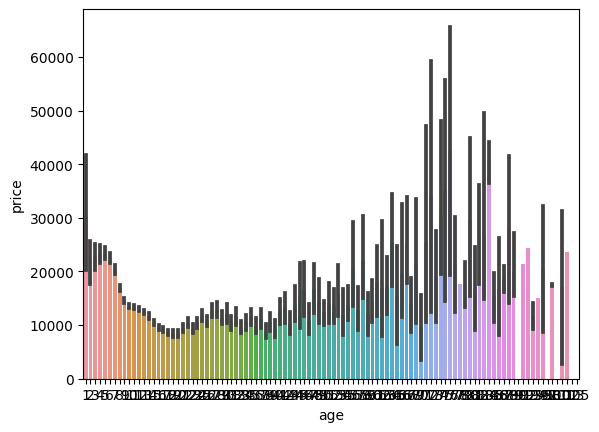

In [8]:
sns.barplot(x="age", y="price", data=df.to_pandas())

## manufacturer

サンプル数が少ないものもあるので、otherとかにしたほうがいいかも

In [9]:
df["manufacturer"].value_counts(sort=True)

manufacturer,counts
cat,u32
"""ford""",13890
"""chevrolet""",7566
"""bmw""",6223
"""honda""",3573
"""toyota""",3531
"""ram""",3245
"""jeep""",2570
"""nissan""",2024
"""volkswagen""",1545


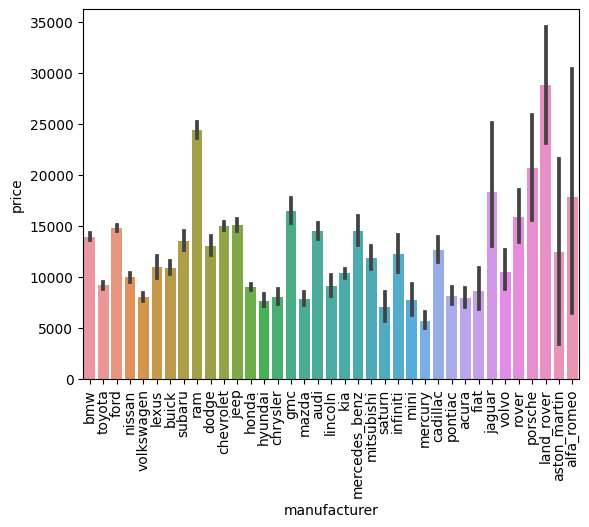

In [10]:
ax = sns.barplot(x="manufacturer", y="price", data=df.to_pandas())
plt.xticks(rotation=90)
plt.show()

## condition
これはlabelencodingでいけそう

New
Like new
Excellent
Good
Salvage
Fair

In [12]:
df["condition"].value_counts(sort=True)

condition,counts
cat,u32
"""excellent""",30440
"""good""",12020
"""like new""",7647
"""fair""",4773
"""new""",116
"""salvage""",73


<Axes: xlabel='condition', ylabel='price'>

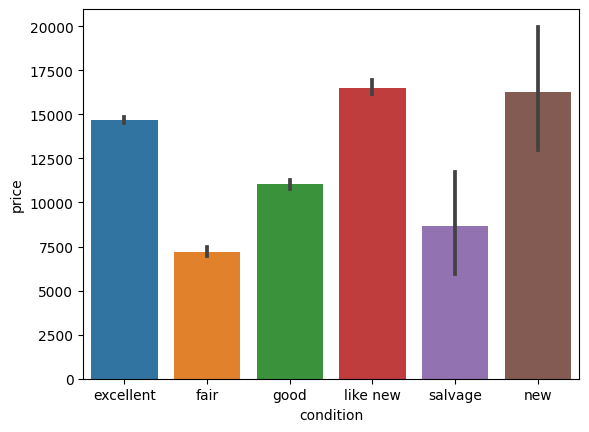

In [13]:
sns.barplot(x="condition", y="price", data=df.to_pandas())

## cyclinders

現在の軽自動車は3気筒、乗用車では4〜8気筒が主流となっていますが、大型車やスポーツカーでは気筒数が多く、排気量も大きくなります。

In [14]:
df["cylinders"].value_counts()

cylinders,counts
i8,u32
8,11340
10,117
3,55
4,20069
12,31
5,107
6,23201
-1,149


<Axes: xlabel='cylinders', ylabel='price'>

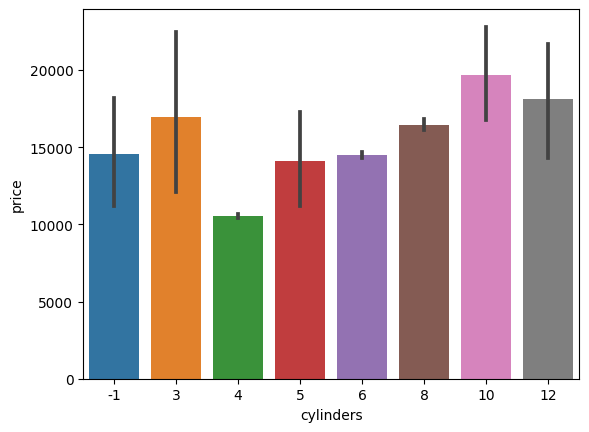

In [16]:
sns.barplot(x="cylinders", y="price", data=df.to_pandas())

## fuel

In [18]:
df["fuel"].value_counts(sort=True)

fuel,counts
cat,u32
"""gas""",49707
"""diesel""",5154
"""hybrid""",144
"""other""",39
"""electric""",25


<Axes: xlabel='fuel', ylabel='price'>

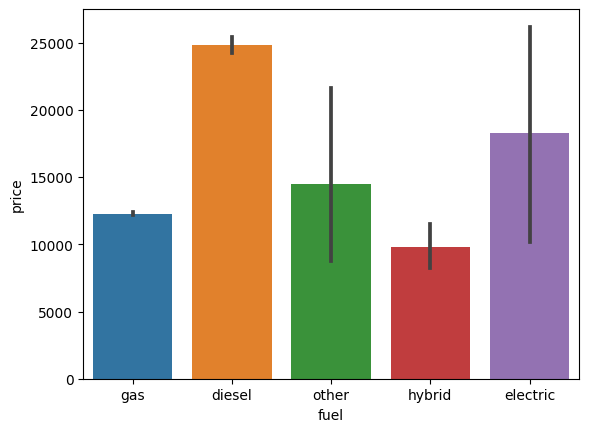

In [19]:
sns.barplot(x="fuel", y="price", data=df.to_pandas())

# odometer

In [20]:
df["odometer"].describe()

statistic,value
str,f64
"""count""",55069.0
"""null_count""",388.0
"""mean""",117136.448401
"""std""",61265.139878
"""min""",10.0
"""25%""",80006.0
"""50%""",112407.0
"""75%""",150946.0
"""max""",2.946e6


<Axes: ylabel='Count'>

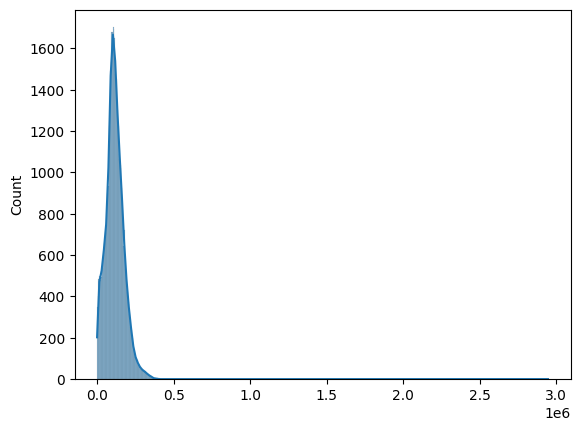

In [22]:
sns.histplot(df["odometer"], kde=True)

## title_status

In [24]:
df["title_status"].value_counts(sort=True)

title_status,counts
cat,u32
"""clean""",45081
"""rebuilt""",5963
"""salvage""",1923
"""lien""",885
"""nan""",685
"""parts only""",290
"""missing""",242


<Axes: xlabel='title_status', ylabel='price'>

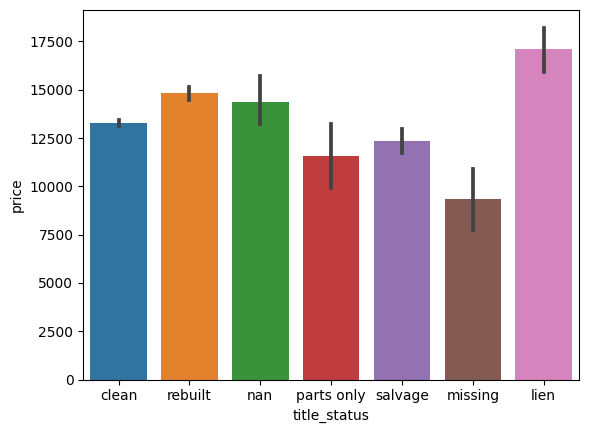

In [25]:
sns.barplot(x="title_status", y="price", data=df.to_pandas())

In [50]:
df.filter(pl.col("title_status") == "nan")

id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,odometer_f,age,odometer/age,odometer/cylinders,manufacturer_odometer_mean,manufacturer_odometer_std,manufacturer_odometer_max,manufacturer_odometer_min,manufacturer_odometer_diff,lat,lng,manufacturer_rank,condition_rank,fuel_rank,title_status_rank,transmission_rank,drive_rank,size_rank,type_rank,paint_color_rank,state_rank,manufacturer_count,condition_count,fuel_count,title_status_count,transmission_count,drive_count,size_count,type_count,paint_color_count,state_count,condition_l,size_l,manufacturer_mean,fuel_mean,title_status_mean,transmission_mean,drive_mean,type_mean,paint_color_mean,state_mean,manufacturer_acura,manufacturer_alfa_romeo,manufacturer_aston_martin,manufacturer_audi,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land_rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes_benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_diesel,fuel_electric,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_nan,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_other,drive_4wd,drive_fwd,type_SUV,type_bus,type_coupe,type_hatchback,type_mini-van,type_nan,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nan,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
i64,cat,i64,cat,cat,i8,cat,i64,cat,cat,cat,cat,cat,cat,cat,i64,f64,i64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
13,"""albany""",2010,"""lexus""","""excellent""",6,"""gas""",81936,"""nan""","""automatic""","""fwd""","""mid-size""","""nan""","""white""","""ny""",8760,81936.0,13,6302.769231,13656.0,133582.736559,59283.533418,360126,8460,351666,42.651167,-73.754968,15.0,6.0,5.0,3.0,3.0,3.0,3.0,7.0,9.0,51.0,187,15219,24785,456,20497,14602,9411,456,3624,2112,3,2,10974.272727,12270.566996,14346.423246,13944.440064,9810.263663,14346.423246,16884.879139,14700.314867,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140,"""florence / mus…",2010,"""toyota""","""fair""",4,"""gas""",173036,"""nan""","""automatic""","""fwd""","""mid-size""","""nan""","""black""","""al""",3255,173036.0,13,13310.461538,43259.0

## transmission

In [26]:
df["transmission"].value_counts()

transmission,counts
cat,u32
"""manual""",12332
"""automatic""",40990
"""other""",1747


<Axes: xlabel='transmission', ylabel='price'>

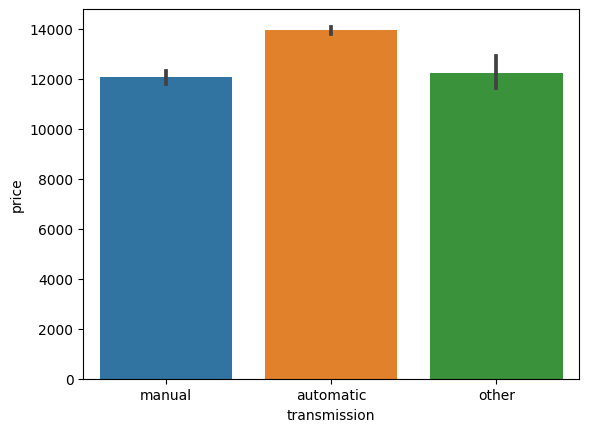

In [28]:
sns.barplot(x="transmission", y="price", data=df.to_pandas())

## drive

In [29]:
df["drive"].value_counts()

drive,counts
cat,u32
"""rwd""",9754
"""fwd""",29213
"""4wd""",16102


<Axes: xlabel='drive', ylabel='price'>

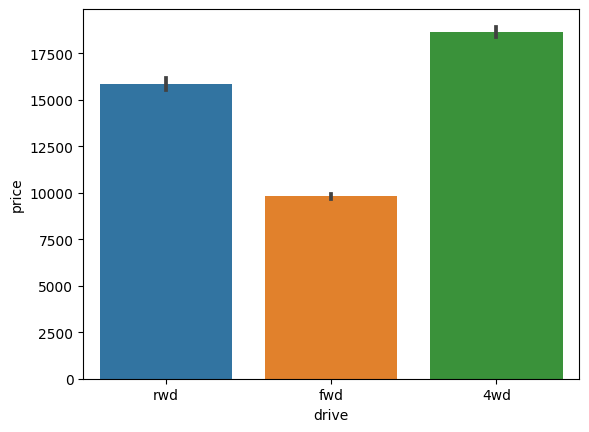

In [30]:
sns.barplot(x="drive", y="price", data=df.to_pandas())

## size

In [31]:
df["size"].value_counts()

size,counts
cat,u32
"""sub-compact""",282
"""compact""",6649
"""mid-size""",18782
"""full-size""",29356


<Axes: xlabel='size', ylabel='price'>

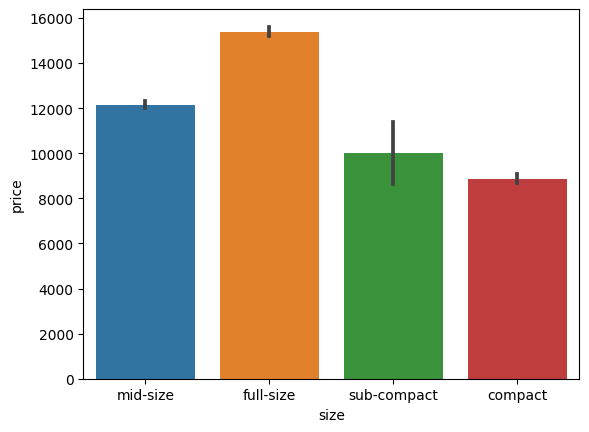

In [32]:
sns.barplot(x="size", y="price", data=df.to_pandas())

## type

In [34]:
df["type"].value_counts(sort=True)

type,counts
cat,u32
"""sedan""",18735
"""SUV""",14566
"""truck""",7625
"""coupe""",4589
"""pickup""",4249
"""hatchback""",1334
"""van""",1080
"""convertible""",879
"""nan""",685


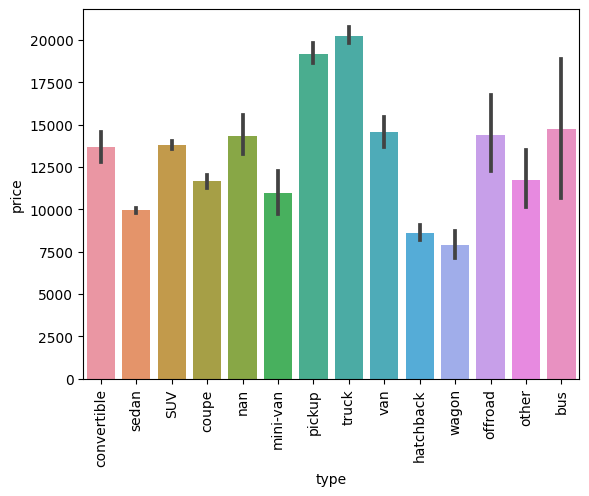

In [36]:
sns.barplot(x="type", y="price", data=df.to_pandas())
plt.xticks(rotation=90)
plt.show()

In [51]:
df.filter(pl.col("type") == "nan")

id,region,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,odometer_f,age,odometer/age,odometer/cylinders,manufacturer_odometer_mean,manufacturer_odometer_std,manufacturer_odometer_max,manufacturer_odometer_min,manufacturer_odometer_diff,lat,lng,manufacturer_rank,condition_rank,fuel_rank,title_status_rank,transmission_rank,drive_rank,size_rank,type_rank,paint_color_rank,state_rank,manufacturer_count,condition_count,fuel_count,title_status_count,transmission_count,drive_count,size_count,type_count,paint_color_count,state_count,condition_l,size_l,manufacturer_mean,fuel_mean,title_status_mean,transmission_mean,drive_mean,type_mean,paint_color_mean,state_mean,manufacturer_acura,manufacturer_alfa_romeo,manufacturer_aston_martin,manufacturer_audi,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,manufacturer_fiat,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_infiniti,manufacturer_jaguar,manufacturer_jeep,manufacturer_kia,manufacturer_land_rover,manufacturer_lexus,manufacturer_lincoln,manufacturer_mazda,manufacturer_mercedes_benz,manufacturer_mercury,manufacturer_mini,manufacturer_mitsubishi,manufacturer_nissan,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo,fuel_diesel,fuel_electric,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_nan,title_status_parts only,title_status_rebuilt,title_status_salvage,transmission_automatic,transmission_other,drive_4wd,drive_fwd,type_SUV,type_bus,type_coupe,type_hatchback,type_mini-van,type_nan,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,paint_color_black,paint_color_blue,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow,state_ak,state_al,state_ar,state_az,state_ca,state_co,state_ct,state_dc,state_de,state_fl,state_ga,state_hi,state_ia,state_id,state_il,state_in,state_ks,state_ky,state_la,state_ma,state_md,state_me,state_mi,state_mn,state_mo,state_ms,state_mt,state_nan,state_nc,state_nd,state_ne,state_nh,state_nj,state_nm,state_nv,state_ny,state_oh,state_ok,state_or,state_pa,state_ri,state_sc,state_sd,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
i64,cat,i64,cat,cat,i8,cat,i64,cat,cat,cat,cat,cat,cat,cat,i64,f64,i64,f64,f64,f64,f64,i64,i64,i64,f64,f64,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8
13,"""albany""",2010,"""lexus""","""excellent""",6,"""gas""",81936,"""nan""","""automatic""","""fwd""","""mid-size""","""nan""","""white""","""ny""",8760,81936.0,13,6302.769231,13656.0,133582.736559,59283.533418,360126,8460,351666,42.651167,-73.754968,15.0,6.0,5.0,3.0,3.0,3.0,3.0,7.0,9.0,51.0,187,15219,24785,456,20497,14602,9411,456,3624,2112,3,2,10974.272727,12270.566996,14346.423246,13944.440064,9810.263663,14346.423246,16884.879139,14700.314867,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
140,"""florence / mus…",2010,"""toyota""","""fair""",4,"""gas""",173036,"""nan""","""automatic""","""fwd""","""mid-size""","""nan""","""black""","""al""",3255,173036.0,13,13310.461538,43259.0

## paint_color

In [37]:
df["paint_color"].value_counts()

paint_color,counts
cat,u32
"""green""",4670
"""brown""",752
"""grey""",2256
"""orange""",269
"""silver""",8669
"""purple""",48
"""blue""",7623
"""custom""",399
"""yellow""",64


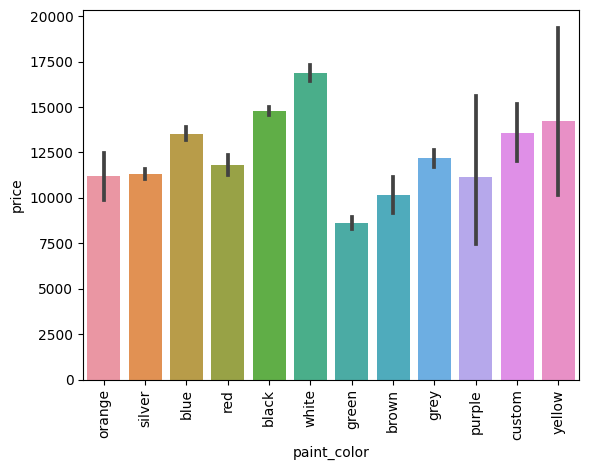

In [40]:
sns.barplot(x="paint_color", y="price", data=df.to_pandas())
plt.xticks(rotation=90)
plt.show()

## state

In [42]:
df["state"].value_counts(sort=True)

state,counts
cat,u32
"""ca""",6025
"""ny""",4301
"""fl""",3775
"""nj""",3243
"""tx""",2791
"""pa""",2219
"""oh""",1913
"""mi""",1781
"""va""",1655


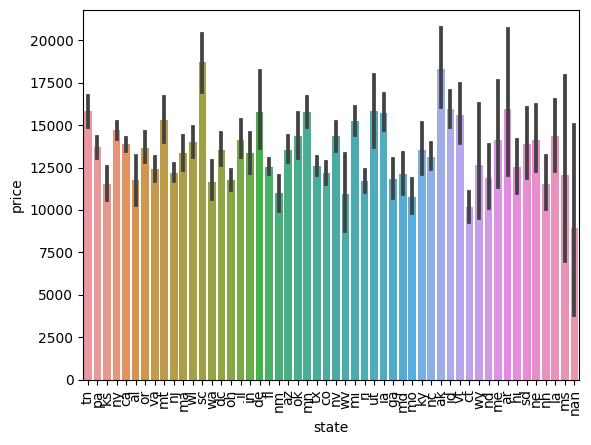

In [45]:
sns.barplot(x="state", y="price", data=df.to_pandas())
plt.xticks(rotation=90)
plt.show()

## price

<Axes: xlabel='price', ylabel='Count'>

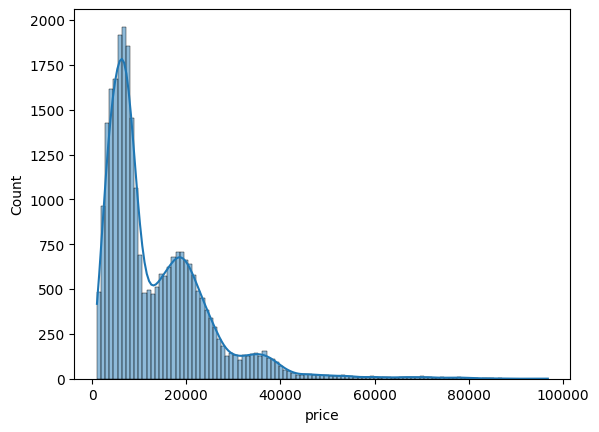

In [39]:
sns.histplot(df["price"], kde=True)

manufacturerごとのtypeの数一覧

In [86]:
pl.Config.set_tbl_rows(-1)
df_type = df.to_pandas()
df_type.pivot_table(index='manufacturer', columns='type', values='id', aggfunc='count', fill_value=0)

type,convertible,sedan,SUV,coupe,nan,mini-van,pickup,truck,van,hatchback,wagon,offroad,other,bus
manufacturer,,,,,,,,,,,,,,
bmw,515,2481,1831,1180,84,0,0,114,0,5,12,0,1,0
toyota,15,1277,1148,207,46,65,160,228,63,244,50,14,14,0
ford,160,3173,2888,1181,203,87,1895,3332,591,152,75,26,94,33
nissan,1,1223,493,65,19,36,15,35,24,94,16,0,3,0
volkswagen,6,1222,82,102,14,5,0,0,1,99,12,0,2,0
lexus,2,186,172,16,5,0,0,0,0,4,0,0,0,0
buick,3,732,380,121,13,70,0,0,11,7,1,0,5,0
subaru,0,83,363,3,6,0,5,5,0,13,79,4,1,0
ram,0,15,223,0,50,5,1112,1812,11,0,7,8,2,0
